In [ ]:
!pip install --upgrade --quiet pytube

In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pytube import Playlist
import pandas as pd

In [ ]:
playlist = Playlist('https://www.youtube.com/playlist?list=PLnkRJFUtBDzWOEnVOiWTVxGOWD70LDwtC')
youtube_playlist = pd.DataFrame(columns=['video_title', 'url',"video_id"])

#Loop through all videos in the playlist and download them
for video in playlist.videos:
    row = pd.DataFrame({'video_title': [video.title],'url': [video.watch_url],'video_id':[video.watch_url.split("=")[-1]]})

    #Append the row to the DataFrame
    youtube_playlist = pd.concat([youtube_playlist, row], ignore_index=True)


youtube_playlist.to_excel("youtube_playlist.xlsx", index=False)
youtube_playlist

,video_title,url,video_id
0,Ashes of the Damned,https://youtube.com/watch?v=K5pMoSECagE,K5pMoSECagE
1,Caravans to the Outer Worlds,https://youtube.com/watch?v=ErTgN2zoTkA,ErTgN2zoTkA
2,White Nile,https://youtube.com/watch?v=4ShzP_M7W-k,4ShzP_M7W-k
3,Of Mice & Men - Obsolete (Official Music Video),https://youtube.com/watch?v=hxu3KXVy48w,hxu3KXVy48w
4,Deathcult,https://youtube.com/watch?v=1CdtbR9JHCA,1CdtbR9JHCA
5,Omerta,https://youtube.com/watch?v=-xYZM04JxnQ,-xYZM04JxnQ
6,Senseless Massacre,https://youtube.com/watch?v=F3A_3c882us,F3A_3c882us
7,Lamb of God - The Faded Line (Official Audio),https://youtube.com/watch?v=JuRRnVqv2Vc,JuRRnVqv2Vc
8,Memento Mori (Official Video),https://youtube.com/watch?v=hBj0-dIU8HI,hBj0-dIU8HI
9,And Plague Flowers the Kaleidoscope,https://youtube.com/watch?v=BNyYiTdqzAY,BNyYiTdqzAY


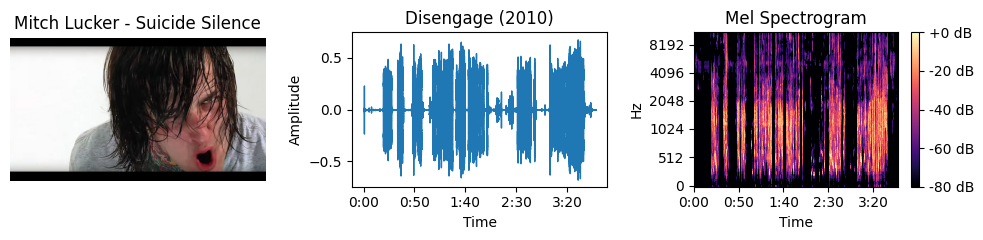

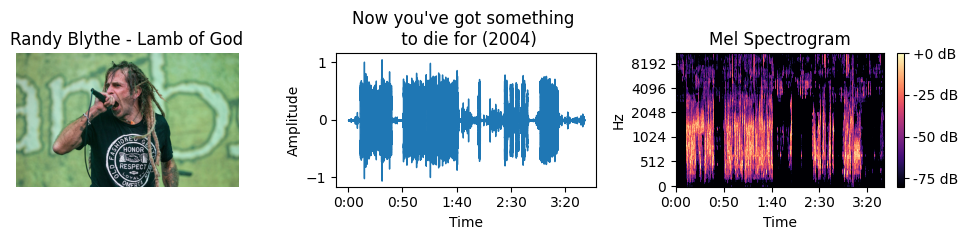

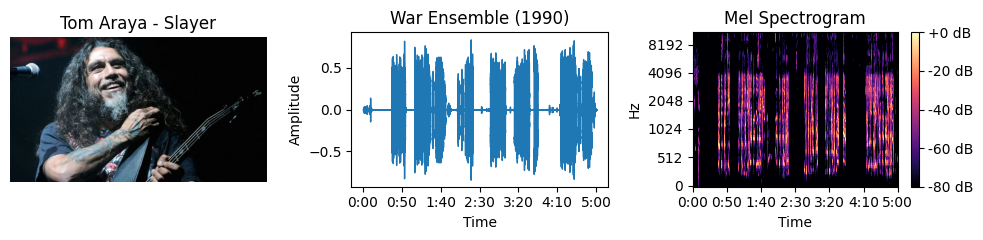

In [ ]:
filenames = [
    ['Mitch Lucker - Suicide Silence','Disengage (2010)','/content/mitch lucker.jpg',"/content/SUICIDE SILENCE - Disengage - Performance Cut (OFFICIAL VIDEO)_vocal.mp3"],
    ['Randy Blythe - Lamb of God',"Now you've got something \n to die for (2004)",'/content/Randy-Blythe.jpg',"/content/Now You've Got Something to Die For_vocal.mp3"],
    ['Tom Araya - Slayer', 'War Ensemble (1990)' ,'/content/tom araya.jpg', '/content/Slayer - War Ensemble_vocal.mp3']

 ]

for f in filenames:

  fig = plt.figure(figsize=(10,2.5))
  plt.subplot(1, 3, 1)
  img = mpimg.imread(f[2])
  imgplot = plt.imshow(img)
  plt.axis('off')
  plt.gca().set_title(f[0])

  y, sr = librosa.load(f[3])
  plt.subplot(1, 3, 2)
  # trim silent edges
  song, _ = librosa.effects.trim(y)
  fig.gca().set_ylabel("Amplitude")
  plt.gca().set_title(f[1])
  librosa.display.waveshow(song, sr=sr)


  plt.subplot(1, 3, 3)
  hop_length=512
  S = librosa.feature.melspectrogram(y=song, sr=sr, n_fft=2048, hop_length=hop_length, n_mels=128)
  S_DB = librosa.power_to_db(S, ref=np.max)
  librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel')
  plt.colorbar(format='%+2.0f dB')
  plt.gca().set_title("Mel Spectrogram")
  plt.tight_layout();